# Data Scientist  Survey: Asian vs. European
**This project will follow a standard industry practice of utilizing CRISP-DM with the data from Stack Overflow Developer Survey Results**:

* **1. Business Understanding**: The objective is to understand the developers salaries for two areas and the factor that impact them based on the Stackoverflow developer 2017 survey that could be found in :  [Stack Overflow data from 2017](https://www.kaggle.com/stackoverflow/so-survey-2017/data)

* **2. Data Understanding**: Will utilize Stack Overflow Developer Survey Results, primarly survey_results_public.csv. I have propsed 3 questions that will be asked below to better understand the data.

* **3. Prepare Data**: Only need to keep and condense necessry columns for a dataframe plus handle use of NaN values.

* **4. Data Modeling**: Will utlize tables and graphs.

* **5. Evaluate the Results**: Results will be noted in this notebook but also in the blog post.




### 1. Business Understanding

For this project we will try to find out the below observations:

* Salary comparison between Asian and European.
* Salary comparison with respect to education level.
* Finally find out salary growth with respect to job experience.

### 2. Data Understanding

* First of all we we import all of necessary libraries.
* We read the data as it will be a general view with necessary information.


In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Parameters:
    df: a dataframe
'''

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

#### Here we find out the graphical view of Education Status.

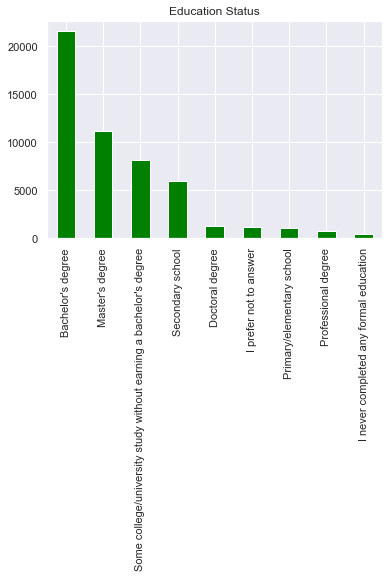

In [4]:
sns.set(font_scale=1)
df['FormalEducation'].value_counts().plot(kind='bar',color = 'green' );
plt.title("Education Status");

#### From the whole data we select just our necessary columns so that data handle will be more suitable for us.


In [5]:
# Select Useful columns for find out result
columns = ['Country', 'YearsProgram', 'FormalEducation', 'Salary']
pd.DataFrame(df.query("Professional == 'Professional developer' and EmploymentStatus == 'Employed full-time'"))[columns]
data = df[columns]

data.head()


,Country,YearsProgram,FormalEducation,Salary
0,United States,2 to 3 years,Secondary school,NaN
1,United Kingdom,9 to 10 years,Some college/university study without earning ...,NaN
2,United Kingdom,20 or more years,Bachelor's degree,113750.0
3,United States,14 to 15 years,Doctoral degree,NaN
4,Switzerland,20 or more years,Master's degree,NaN


### 3. Data preparation
#### From all countries we are just taken Asian and European countries in two categories. Now we work with our finding into these.

In [6]:
'''
Seperate as two regions

'''



Asia = ['China', 'India','Indonesia', 'Pakistan','Bangladesh','Japan', 'Philippines', 'Vietnam','Turkey', 'Thailand',
        'South Korea', 'Malaysia','North Korea', 'Sri Lanka', 'United Arab Emirates', 'Nepal', 'Yemen','Jordan']

Europe = ['Albania', 'Austria','Belgium', 'Bulgaria','Denmark','Estonia', 'Finland', 'France','Germany', 'Greece', 'Iceland', 
          'Ireland','Italy', 'Liechtenstein', 'Netherlands', 'Norway', 'Poland','Portugal' 'Russia', 'Spain', 'Sweden', 'Switzerland','Ukraine','United Kingdom']

  
# Seperating Asisn and European
data['Location'] = data['Country'].apply(lambda x: 'Asia' if x in Asia else ('Europe' if x in Europe else 'Other'))

data.head()


<ipython-input-6-91a2e4b0e2ee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location'] = data['Country'].apply(lambda x: 'Asia' if x in Asia else ('Europe' if x in Europe else 'Other'))


,Country,YearsProgram,FormalEducation,Salary,Location
0,United States,2 to 3 years,Secondary school,NaN,Other
1,United Kingdom,9 to 10 years,Some college/university study without earning ...,NaN,Europe
2,United Kingdom,20 or more years,Bachelor's degree,113750.0,Europe
3,United States,14 to 15 years,Doctoral degree,NaN,Other
4,Switzerland,20 or more years,Master's degree,NaN,Europe


In [7]:
correlation = data.groupby(['Location','YearsProgram']).mean()
correlation

Salary
Location YearsProgram                  
Asia     1 to 2 years      10078.770403
         10 to 11 years    17228.901236
         11 to 12 years    15179.246491
         12 to 13 years    23928.685327
         13 to 14 years    30956.869243
...                                 ...
Other    6 to 7 years      54963.163333
         7 to 8 years      55470.196954
         8 to 9 years      57356.214727
         9 to 10 years     58861.381528
         Less than a year  43719.573756

[63 rows x 1 columns]

### 4. Data Modeling
No data modeling is required in this project 

### 5. Restuls Evaluation

#### Q1. Average salary of Asian and European.

In [8]:
correlation.groupby('Location').mean().Salary/50

Location
Asia       384.476813
Europe     873.995741
Other     1313.734182
Name: Salary, dtype: float64

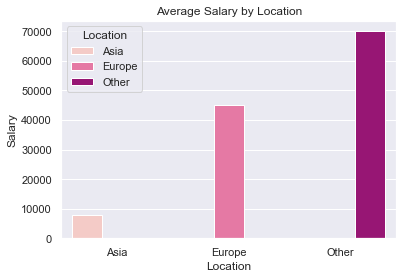

In [9]:
plot_salary = data.groupby(['Location'])['Salary'].median().reset_index()
sns.barplot(x = 'Location', y = 'Salary', data = plot_salary, hue = 'Location', palette = 'RdPu')
plt.title('Average Salary by Location');
plt.show()

**Summary**:The salary range is much higher in Europe than in Asia. Both Europe and Asian salary range is much lower than the average of other countries.

### Q2. Average Salary Based on Location and Education

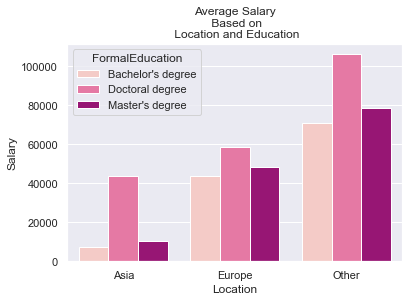

In [10]:
combine = data.copy()
combine = combine[combine['FormalEducation'].isin(["Bachelor's degree","Master's degree",'Doctoral degree'])]       
combine_plot = combine.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()
sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', palette = 'RdPu', data = combine_plot)
plt.title('Average Salary\n Based on\n Location and Education');

**Summary**: We can differentiate salary range with their Education Status. For Doctoral degrees, the salary range is higher in Europe than in Asia with a small difference as compared to master's and Bachelor's. Bachelor's and Master's degree graduate's has a much higher salary in Europe than in Asia. Both Europe and Asian salary range is much lower than the average of other countries.

#### Q3. Salary growth of Asian and European respect to their job experience

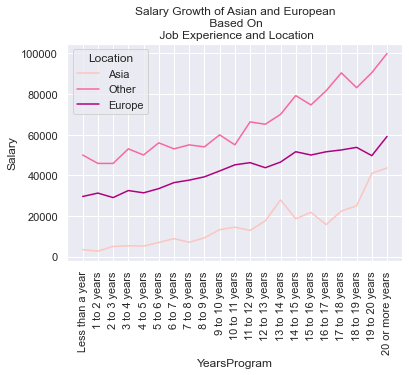

In [11]:
data1 = data.groupby(['Location','YearsProgram'])['Salary'].median().reset_index()
data1 = data1.sort_values(by=['Salary','YearsProgram'])

custom_dict = {'Less than a year': 0, 
               '1 to 2 years': 1, 
               '2 to 3 years': 2, 
               '3 to 4 years': 3,
               '4 to 5 years': 4,
               '5 to 6 years': 5,
               '6 to 7 years': 6,
               '7 to 8 years': 7,
               '8 to 9 years': 8,
               '9 to 10 years': 9,
               '10 to 11 years': 10,
               '11 to 12 years': 11,
               '12 to 13 years': 12,
               '13 to 14 years': 13,
               '14 to 15 years': 14,
               '15 to 16 years': 15,
               '16 to 17 years': 16,
               '17 to 18 years': 17,
               '18 to 19 years': 18,
               '19 to 20 years': 19,
               '20 or more years': 20}
             
data1 = data1.sort_values(by=['YearsProgram'], key=lambda x: x.map(custom_dict))

sns.lineplot(x = 'YearsProgram', y = 'Salary', data = data1, hue = 'Location', palette = 'RdPu')
plt.title('Salary Growth of Asian and European\n Based On\n Job Experience and Location');
plt.xticks(rotation=90);



**Summary**: With no surprise, the pattern is linear over the number of years of programming experience. Those very new to the tech industry, with less than a year of experience, can expect to get a normal pay of USD 3376 in Asia with a year-over-year increment of 18 percent. In Europe, developers with no experience get normal pay of USD 29569 in Europe which is almost 9 times their Asian counterpart and with an increment of only 4 percent.